# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    cite= url+city
    city_url = f'{cite}&appid={weather_api_key}&units=metric'
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

     # Add 1 to the record count
    record_count += 1
    # Run an API request for each city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the city information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | beipiao
Processing Record 2 of Set 1 | geraldton
Processing Record 3 of Set 1 | fort bragg
Processing Record 4 of Set 1 | ibiruba
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | tongchuanshi
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | north branch
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | nuku'alofa
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | kosterevo
Processing Record 15 of Set 1 | dolisie
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | black point
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | touros
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | diamantino
Processing Record 22 of Set 1 | gaiman
Processing Record 23 

In [4]:
# Convert the city_data into a pandas DataFrame for further analysis
city_weather_df = pd.DataFrame(city_data)

# Display the first few rows of the DataFrame
city_weather_df.count()
   

City          615
Lat           615
Lng           615
Max Temp      615
Humidity      615
Cloudiness    615
Wind Speed    615
Country       615
Date          615
dtype: int64

In [5]:
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto deseado,-47.7503,-65.8938,4.32,53,6,3.75,AR,1727233677
1,grytviken,-54.2811,-36.5092,-0.36,94,100,4.88,GS,1727233679
2,kachkanar,58.7000,59.4948,0.98,70,16,2.03,RU,1727233683
3,fortuna,40.5982,-124.1573,11.66,100,100,2.57,US,1727233684
4,bilibino,68.0546,166.4372,-0.29,66,100,0.61,RU,1727233686


In [ ]:
# Export the City_Data into a csv
city_weather_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [5]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

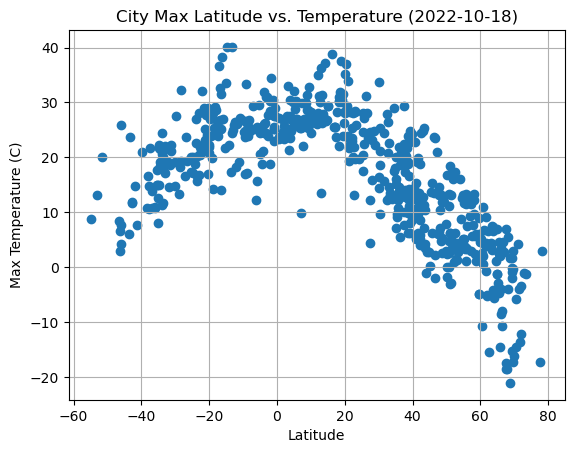

In [20]:
# Build scatter plot for latitude vs. temperature
latitude= city_data_df['Lat']
temprature=city_data_df['Max Temp']

plt.scatter(latitude,temprature, marker='o',)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

plt.show()


#### Latitude Vs. Humidity

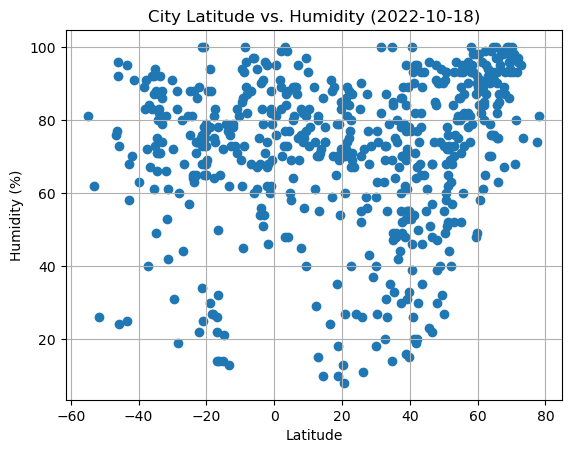

In [21]:
# Build scatter plot for latitude vs. temperature
latitude= city_data_df['Lat']
humidity=city_data_df['Humidity']

plt.scatter(latitude,humidity, marker='o',)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

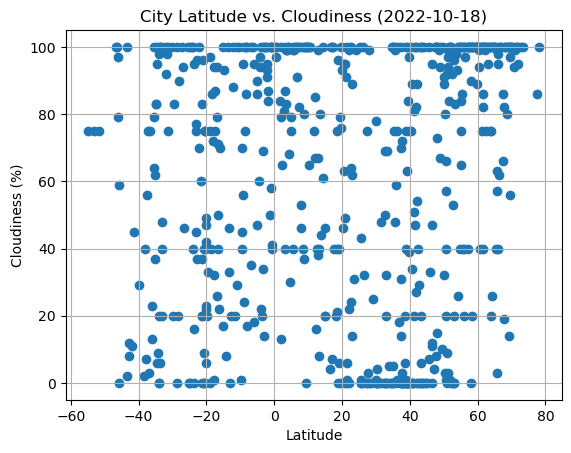

In [23]:
# Build the scatter plots for latitude vs. cloudiness
latitude= city_data_df['Lat']
cloudiness=city_data_df['Cloudiness']

plt.scatter(latitude,cloudiness, marker='o',)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

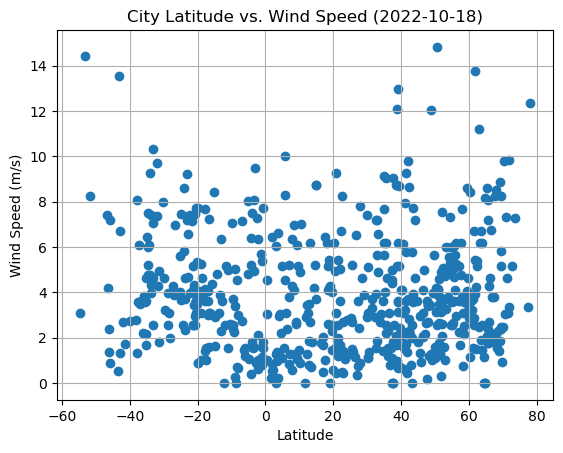

In [24]:
# Build the scatter plots for latitude vs. wind spee
latitude= city_data_df['Lat']
windspeed=city_data_df['Wind Speed']

plt.scatter(latitude,windspeed, marker='o',)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [30]:
# Extracting the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.846254818682536


Text(0.5, 1.0, 'Latitude vs. MaxTemp (2022-10-18)')

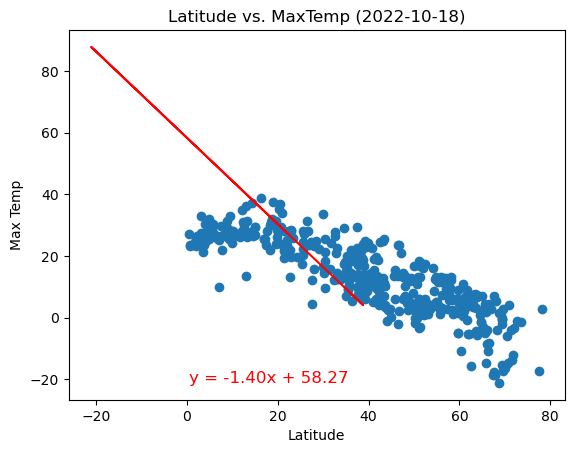

In [64]:
# Linear regression on Northern Hemisphere
import scipy.stats as st
latitude= northern_hemi_df['Lat']
temprature= northern_hemi_df['Max Temp']

# correlation coefficient
pearson_corr, p_value = st.pearsonr(temprature,latitude)
print(f"The r^2-value is: {pearson_corr}")

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(temprature,latitude)

# The regression line
regress_values = slope * temprature + intercept

equation_text = f'y = {slope:.2f}x + {intercept:.2f}'


plt.scatter(latitude,temprature, marker='o')
plt.plot(temprature, regress_values, color='red')

# Incorporate the other graph properties
plt.text(min(latitude), max(temprature)-60, equation_text, fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Latitude vs. MaxTemp (2022-10-18)")




In [51]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.005072410242654756


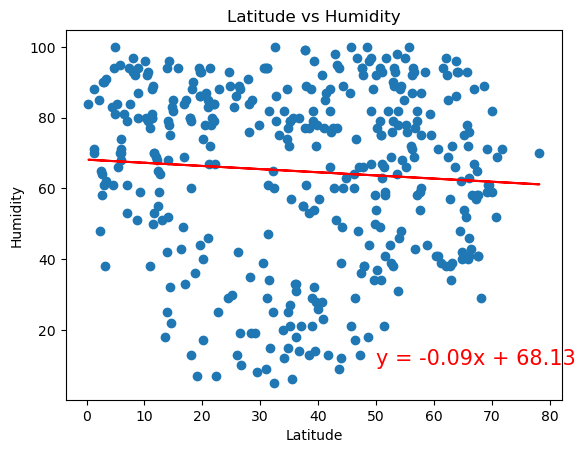

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.0008746520732592251


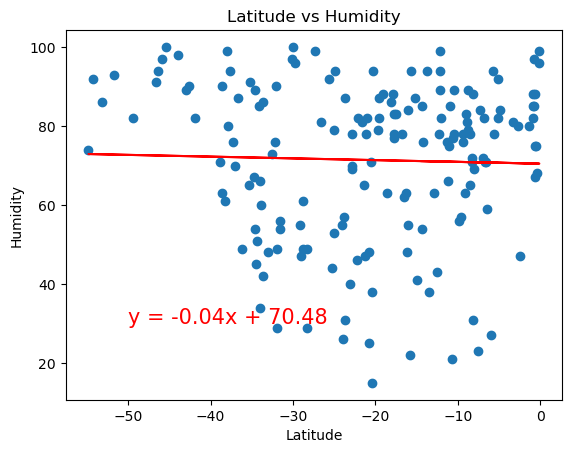

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0062197970047544295


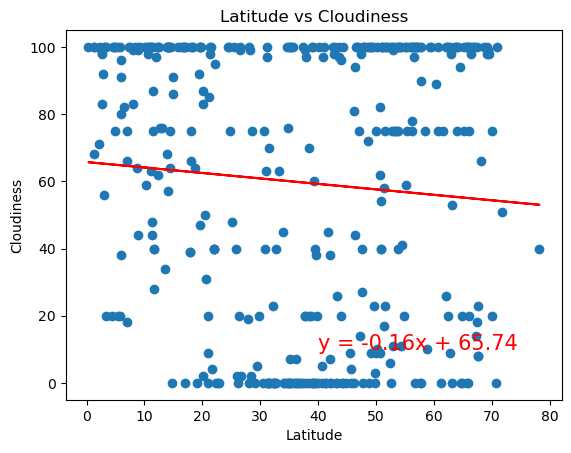

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.03622045202756042


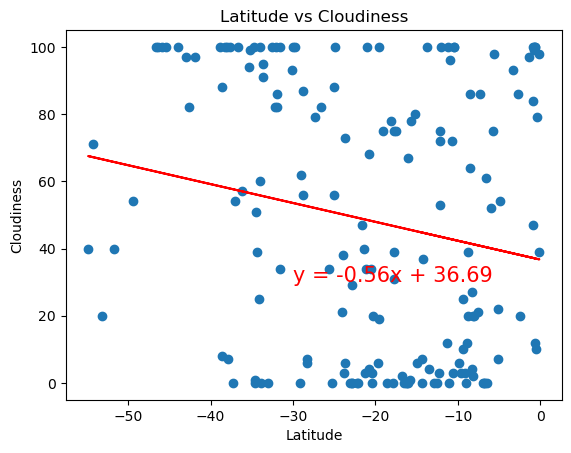

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.012275669442166017


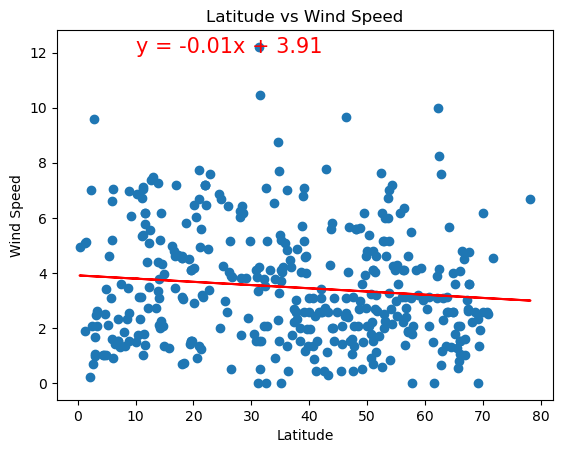

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.010198739304669231


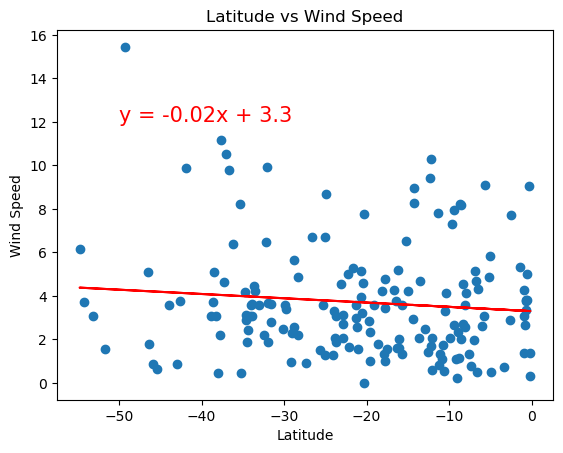

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE